<a href="https://colab.research.google.com/github/HomerTheChicken/PHYS3025Work/blob/main/Homework/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libs in no particular order
from astropy.table import Table
!pip install astroquery
import astroquery
from astroquery.vizier import Vizier
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
%matplotlib inline

In [43]:
# get data without empty values in the rows
v = Vizier(columns=['B-V', 'Vmag', 'Plx', 'e_Plx', 'SpType'], column_filters={'Vmag': '!=','B-V': '!=','Plx': '!=','e_Plx': '!=','SpType': '!='}, row_limit=-1)
result = v.query_constraints(catalog='V/137D')
data_clean = result[0][result[0]['e_Plx']/result[0]['Plx']<0.05]  # keep rows with error less than 0.05: divide mas error by mas paralax then compare
data_clean = data_clean[data_clean['B-V']<2]                      # keep rows with colors that aren't too red (removes outliers)

In [44]:
# perform calculations, name stuff for easy reference
BVColor = data_clean['B-V']
Vmag = data_clean['Vmag']
distance = 1/data_clean['Plx']*10**3                              # d = 1/angle, converted to as from mas
M_v = Vmag - 5*np.log10(distance)+5                               # distance modulus eqn

<ipython-input-44-ea03d7e88349>:2: RuntimeWarning: invalid value encountered in log10
  M_v = Vmag - 5*np.log10(distance)+5


Text(0, 0.5, 'Absolute visual magnitude')

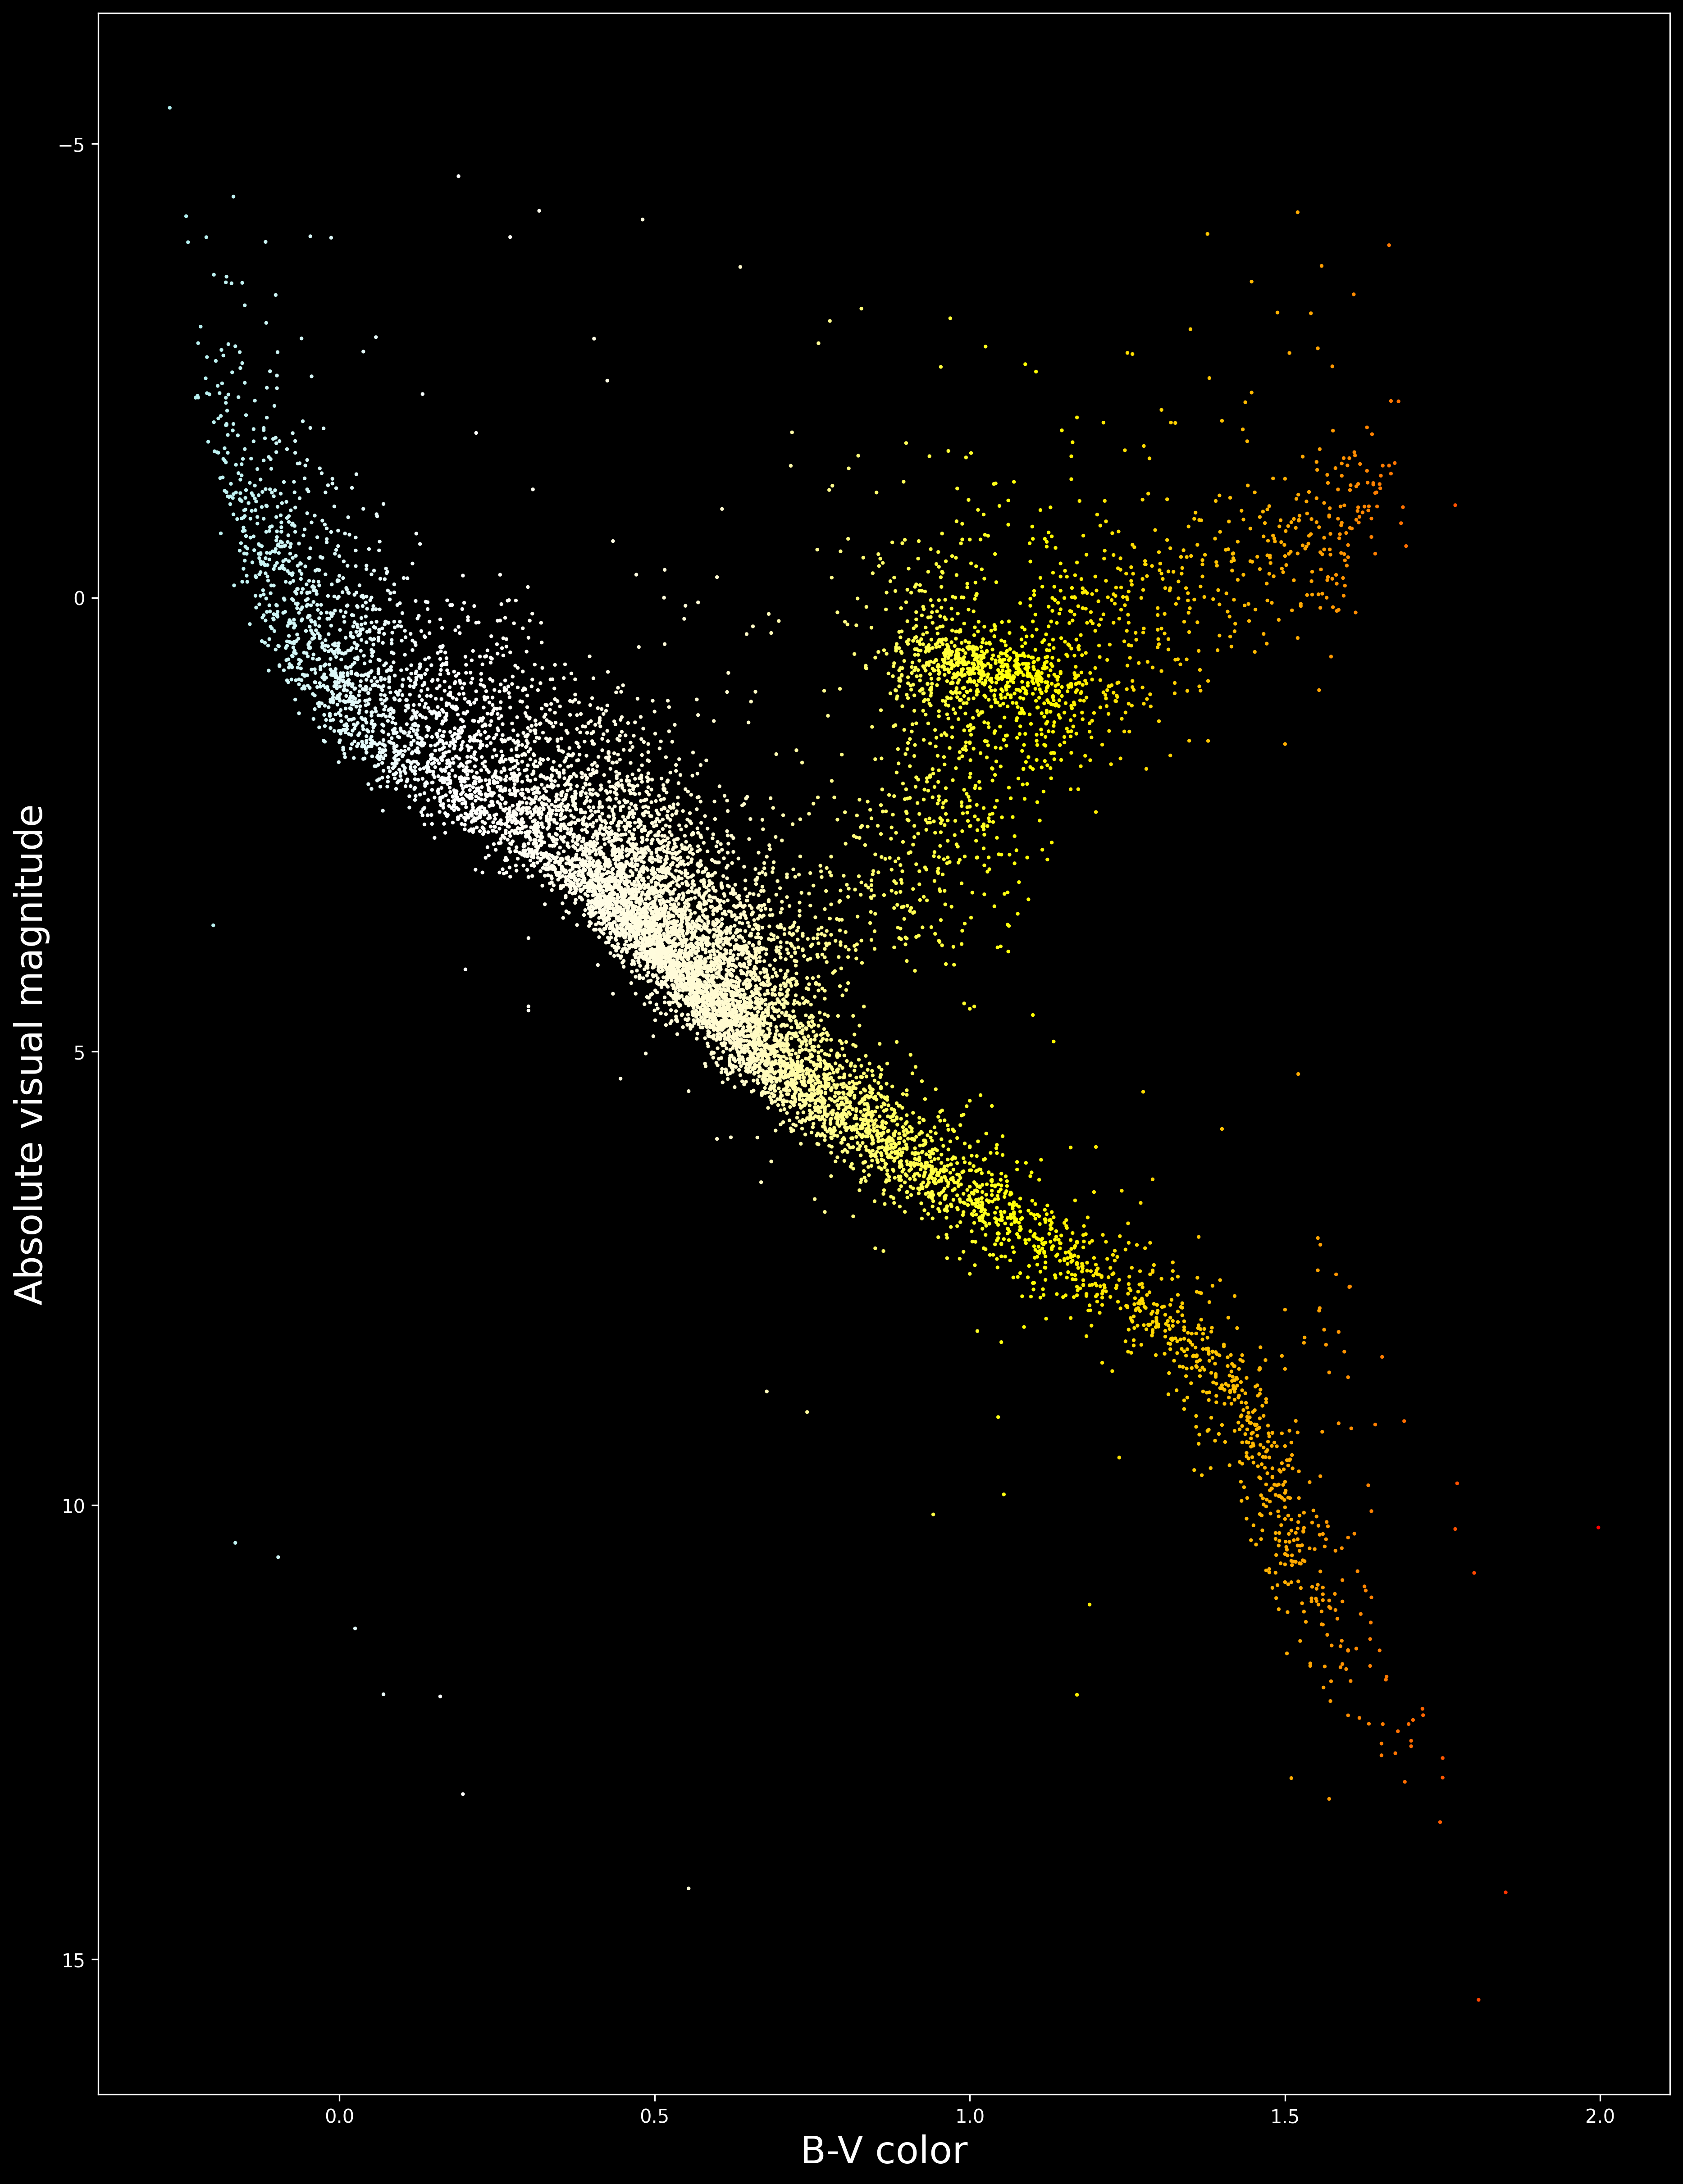

In [45]:
# styling after the plot given in class (100% faked)
colors = ['paleturquoise', 'lemonchiffon', 'gold',  'darkorange', 'red']
fakecolors = matplotlib.colors.ListedColormap(colors)
plt.style.use('dark_background')
plt.figure(figsize=(15, 20), dpi=300)

# make a scatter plot for our HR diagram
plt.scatter(BVColor, M_v, s=1, c=BVColor, cmap='fakecolors')
plt.ylim(reversed(plt.ylim()))
plt.xlabel("B-V color", fontsize=20)
plt.ylabel("Absolute visual magnitude", fontsize=20)